## HealthCare Billing Cost Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
##Reads the data set from csv
df = pd.read_csv('data/insurance.csv')

## displays top 5 entries
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
## Shows shape of data
df.shape

(1338, 7)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical columns

### 3.1 Check Missing values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

##Deletes Duplicates
df = df.drop_duplicates()

df.duplicated().sum()


0

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Insight
- Billing amount mean ~$25500
- Standard deviation for billing amount is quite high
- Possible Negative billing amount

### 3.7 Exploring Data

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())


print("Categories in 'region' variable:     ",end=" " )
print(df['region'].unique())


Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in 'region' variable:      ['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

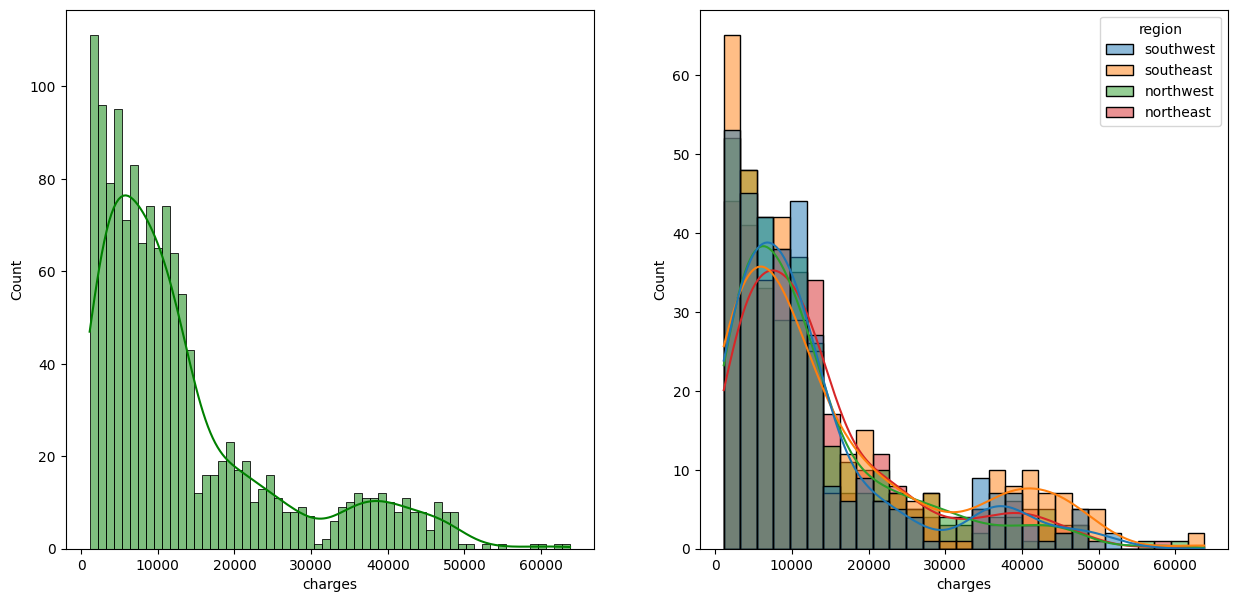

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=60,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='region')
plt.show()

#####  Insights
- Skewed Right Distribution
- Yet more varaiation when looking at region

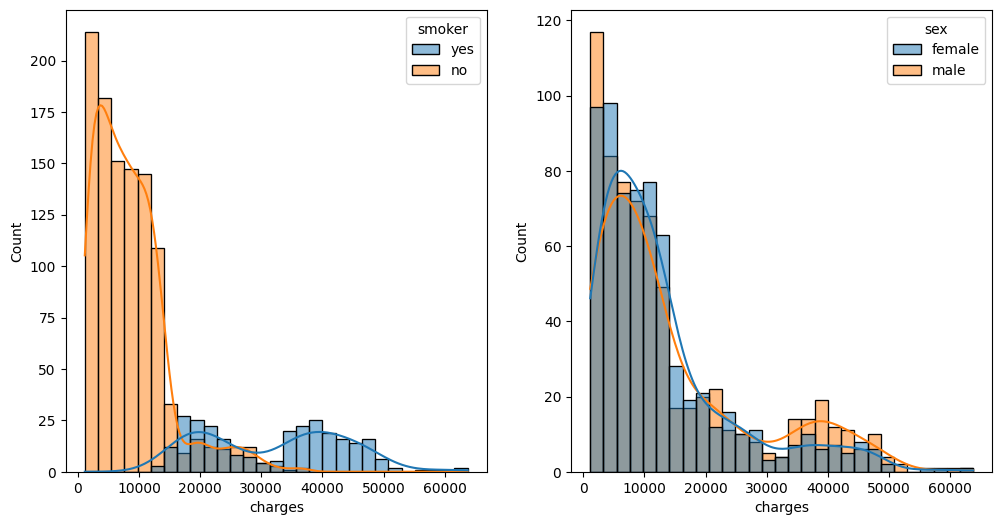

In [32]:
plt.subplots(1,1,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='charges',kde=True,hue='smoker')
plt.subplot(142)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

#####  Insights
- Uniform distribution overall
- Yet more varaiation when looking at Medication

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

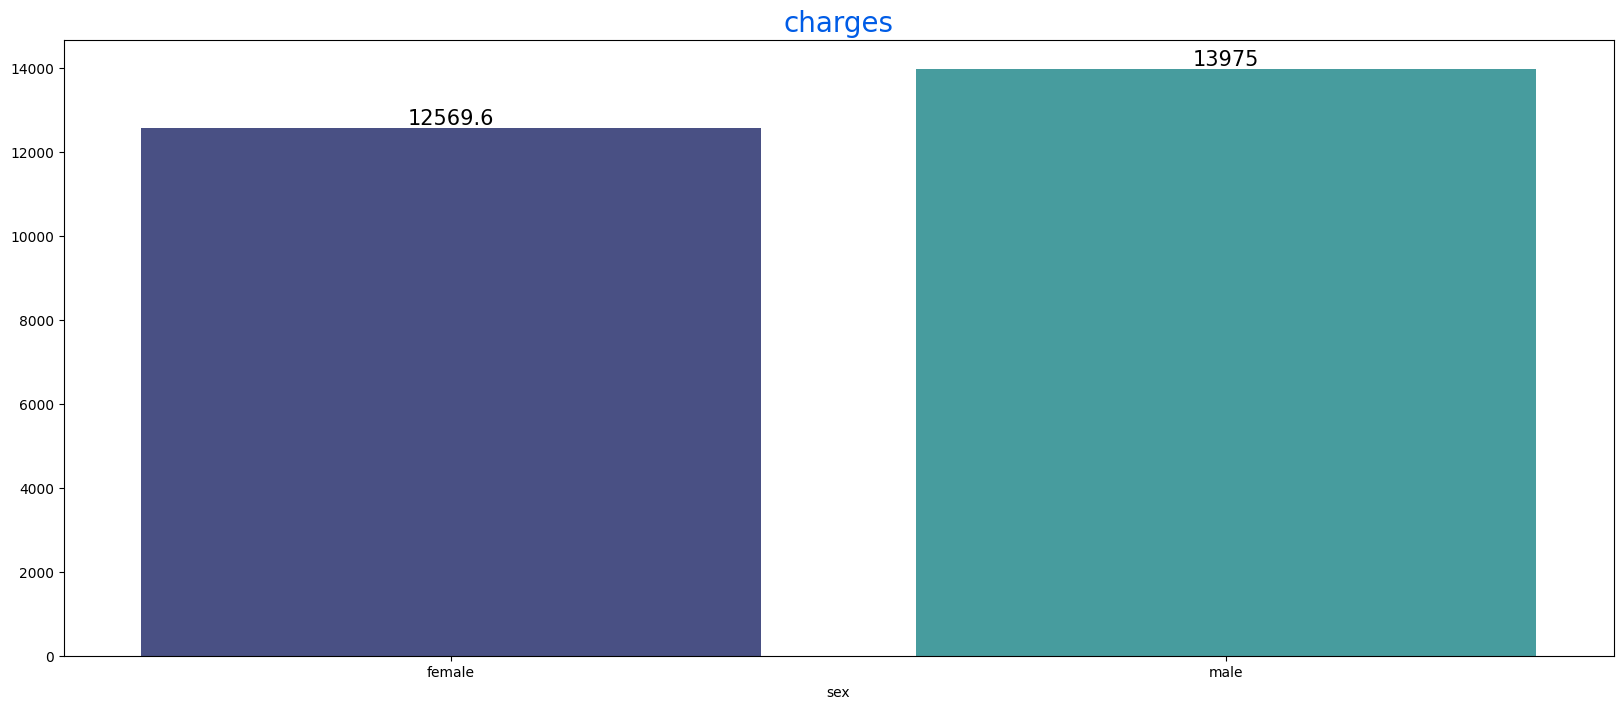

In [19]:
Group_data1=df.groupby('sex')
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=Group_data1['charges'].mean().index,y=Group_data1['charges'].mean().values,palette = 'mako',ax=ax)
ax.set_title('charges',color='#005ce6',size=20)

for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

#####  Insights
- Charges seems to be NOT independent of Gender


## Scatter Plot to see age vs charges

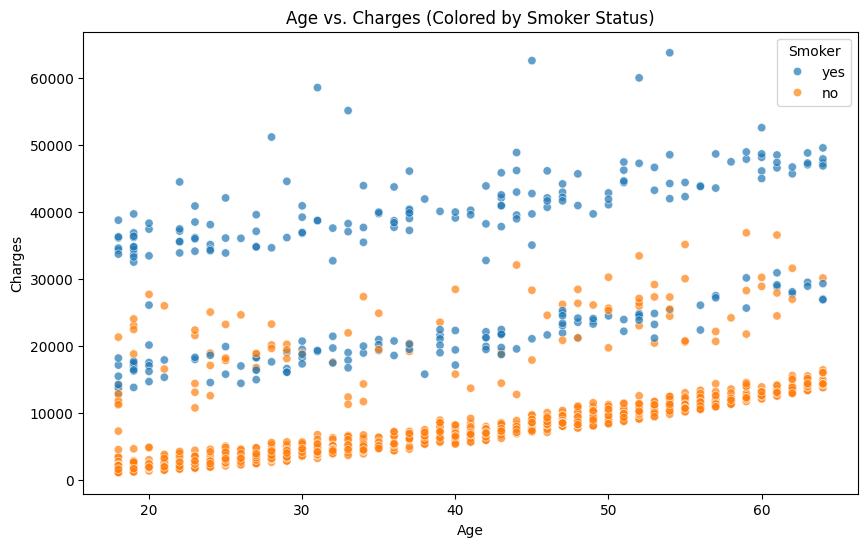

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'], alpha=0.7)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs. Charges (Colored by Smoker Status)")
plt.legend(title="Smoker")

plt.show()

### KDE Plot to see the relationship between Sex and Charges


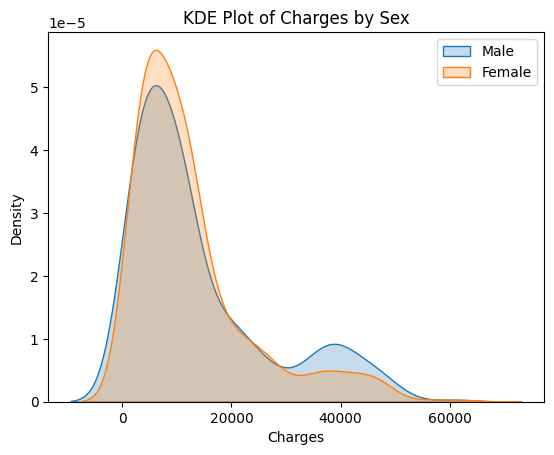

In [33]:
sns.kdeplot(df[df['sex'] == 'male']['charges'], label="Male", shade=True)
sns.kdeplot(df[df['sex'] == 'female']['charges'], label="Female", shade=True)
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title("KDE Plot of Charges by Sex")
plt.legend()
plt.show()

### Checking see relationship between Children and Charges

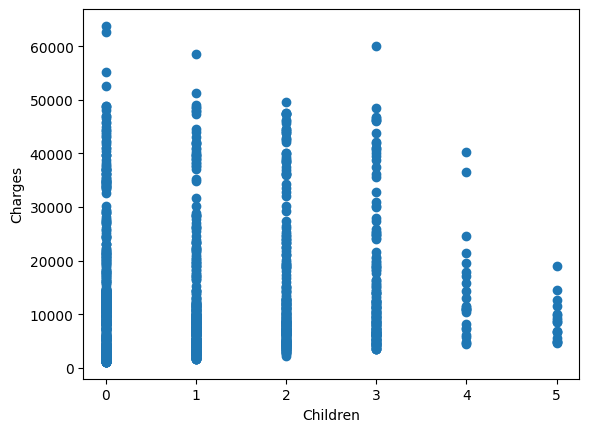

In [35]:
plt.scatter(df['children'], df['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()


In [36]:
correlation = df['children'].corr(df['charges'])
print(correlation)

0.06738935083963248


### Since R is low I don't believe its a feature worth pursuing

### Outliers


<Axes: ylabel='charges'>

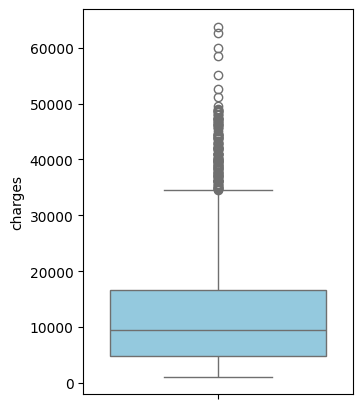

In [20]:
plt.subplots(1,1,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['charges'],color='skyblue')

#### Scatter Plot to see BMI against Charges

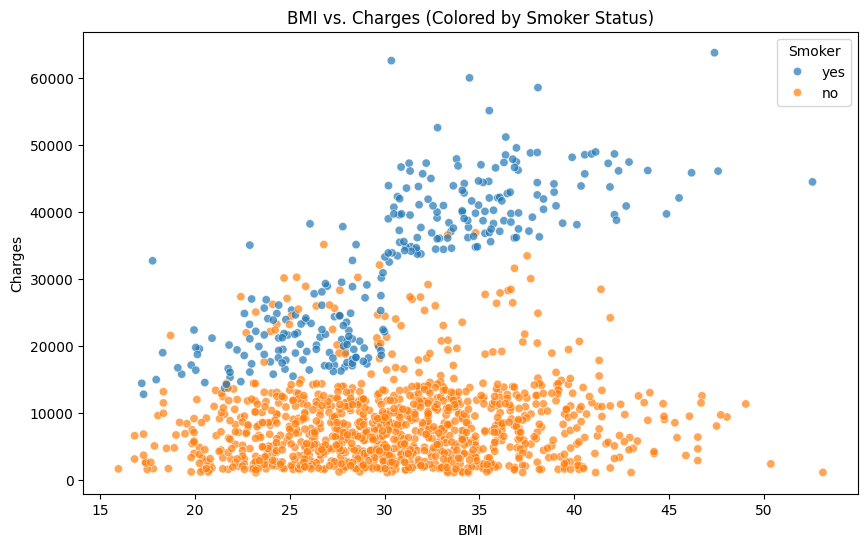

In [27]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'], alpha=0.7)

# Labels and title
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs. Charges (Colored by Smoker Status)")
plt.legend(title="Smoker")

plt.show()

#### Interestingly enough there is a moderate positive correlation between BMI and Charges for Smokers but not for non smokers
##### So we will do some feature engineering to hopefully create variables better for a model!


In [29]:
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker_binary']
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_binary,bmi_smoker_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,1,27.9
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0


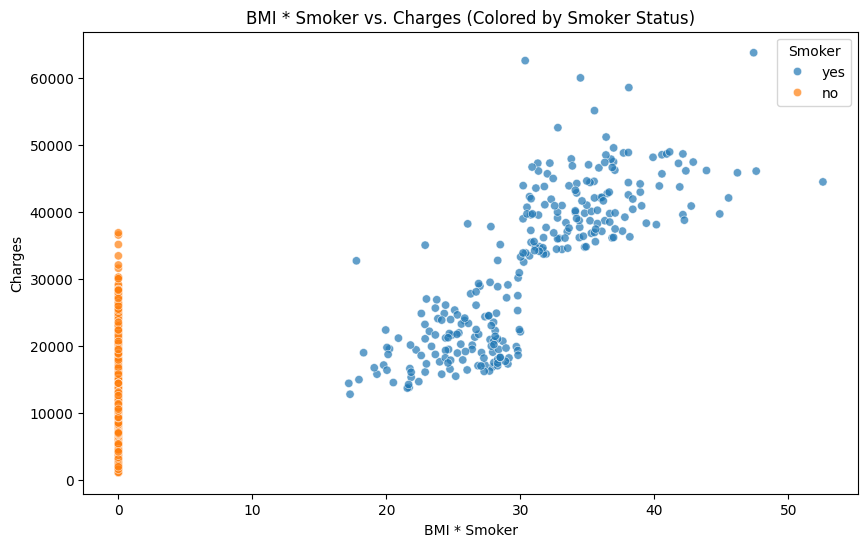

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi_smoker_interaction'], y=df['charges'], hue=df['smoker'], alpha=0.7)

# Labels and title
plt.xlabel("BMI * Smoker")
plt.ylabel("Charges")
plt.title("BMI * Smoker vs. Charges (Colored by Smoker Status)")
plt.legend(title="Smoker")

## Insights

### Relationships of Charges with 
- Smoker
- Smoker * BMI
- Region
- Gender, Maybe
- Age

